# Exploratory Data Analysis LWD F-14 Well

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from ipywidgets import *
import seaborn as sns

In [112]:
data_original = pd.read_csv("LWD_F14.csv")
data_original

Depth    ROP5  GammaRay    SWOB     TQA      RPM   TRPM_RT  \
0      1050.0360     NaN    12.250 -23.575  16.163   59.644  1967.076   
1      1050.1884     NaN    10.563 -22.057   6.511   59.000  2031.250   
2      1050.3408  14.548     8.266 -18.639  11.930   59.320  2031.250   
3      1050.4932   1.062     9.000 -16.902   8.528   60.951  2011.719   
4      1050.6456   0.318     9.000 -22.047   8.493   69.566  1953.956   
...          ...     ...       ...     ...     ...      ...       ...   
17713  3749.3448  23.230       NaN   4.200  14.410  180.000  2812.500   
17714  3749.4972  23.200       NaN   4.720  15.140  179.400       NaN   
17715  3749.6496  22.900       NaN   5.220  15.320  179.490       NaN   
17716  3749.8020  22.550       NaN   5.120  14.790  179.500  2812.500   
17717  3749.9544  22.570       NaN   3.250  15.150  179.460       NaN   

       CRPM_RT  STICK_RT     SPPA      TFLO  AnTemp  AnPres  SHKRSK_RT  ECD  
0         37.0     222.0   67.086  3058.631     NaN     NaN        0.0  NaN  
1          NaN       NaN   73.802  3100.995     NaN     NaN        NaN  NaN  
2         45.0      99.0   73.615  3100.995     NaN     NaN        0.0  NaN  
3         54.0     321.0   73.745  3100.995     NaN     NaN        0.0  NaN  
4         71.0     156.0   74.405  3100.995     NaN     NaN        0.0  NaN  
...        ...       ...      ...       ...     ...     ...        ...  ...  
17713      NaN      45.0  182.500  1962.830     NaN     NaN        NaN  NaN  
17714    179.0       NaN  182.170  1962.830     NaN     NaN        NaN  NaN  
17715      NaN       NaN  182.350  1962.830     NaN     NaN        0.0  NaN  
17716      NaN      36.0  182.280  1962.830     NaN     NaN        NaN  NaN  
17717    176.0       NaN  182.500  1962.830     NaN     NaN        NaN  NaN  

[17718 rows x 15 columns]

In [3]:
data_original.columns

Index(['Depth', 'ROP5', 'GammaRay', 'SWOB', 'TQA', 'RPM', 'TRPM_RT', 'CRPM_RT',
       'STICK_RT', 'SPPA', 'TFLO', 'AnTemp', 'AnPres', 'SHKRSK_RT', 'ECD'],
      dtype='object')

## Well Logging 
Function creation for `@interact` widget for selecting depth

In [11]:
def plotting(start,stop,to_plot):
    fig,axes = plt.subplots(1,len(to_plot), figsize=(20,10))
    for i,log in enumerate(to_plot):
        axes[i].plot(data_original[log],data_original['Depth'])
        axes[i].set_ylim([start, stop])
        axes[i].invert_yaxis()
        axes[i].set_title(log,fontsize=8.5)

In [16]:
import warnings
warnings.filterwarnings('ignore')
to_plot_int = ['ROP5', 'GammaRay', 'SWOB', 'TQA', 'RPM', 'TRPM_RT', 'CRPM_RT', 'STICK_RT', 'SPPA', 'TFLO', 'AnTemp', 'AnPres', 'SHKRSK_RT', 'ECD']
@interact
def modify_depth_range(min_depth =(1000,3800,1),max_depth =(1000,3800,1)):
    return plotting(min_depth,max_depth,to_plot_int)

interactive(children=(IntSlider(value=2400, description='min_depth', max=3800, min=1000), IntSlider(value=2400…

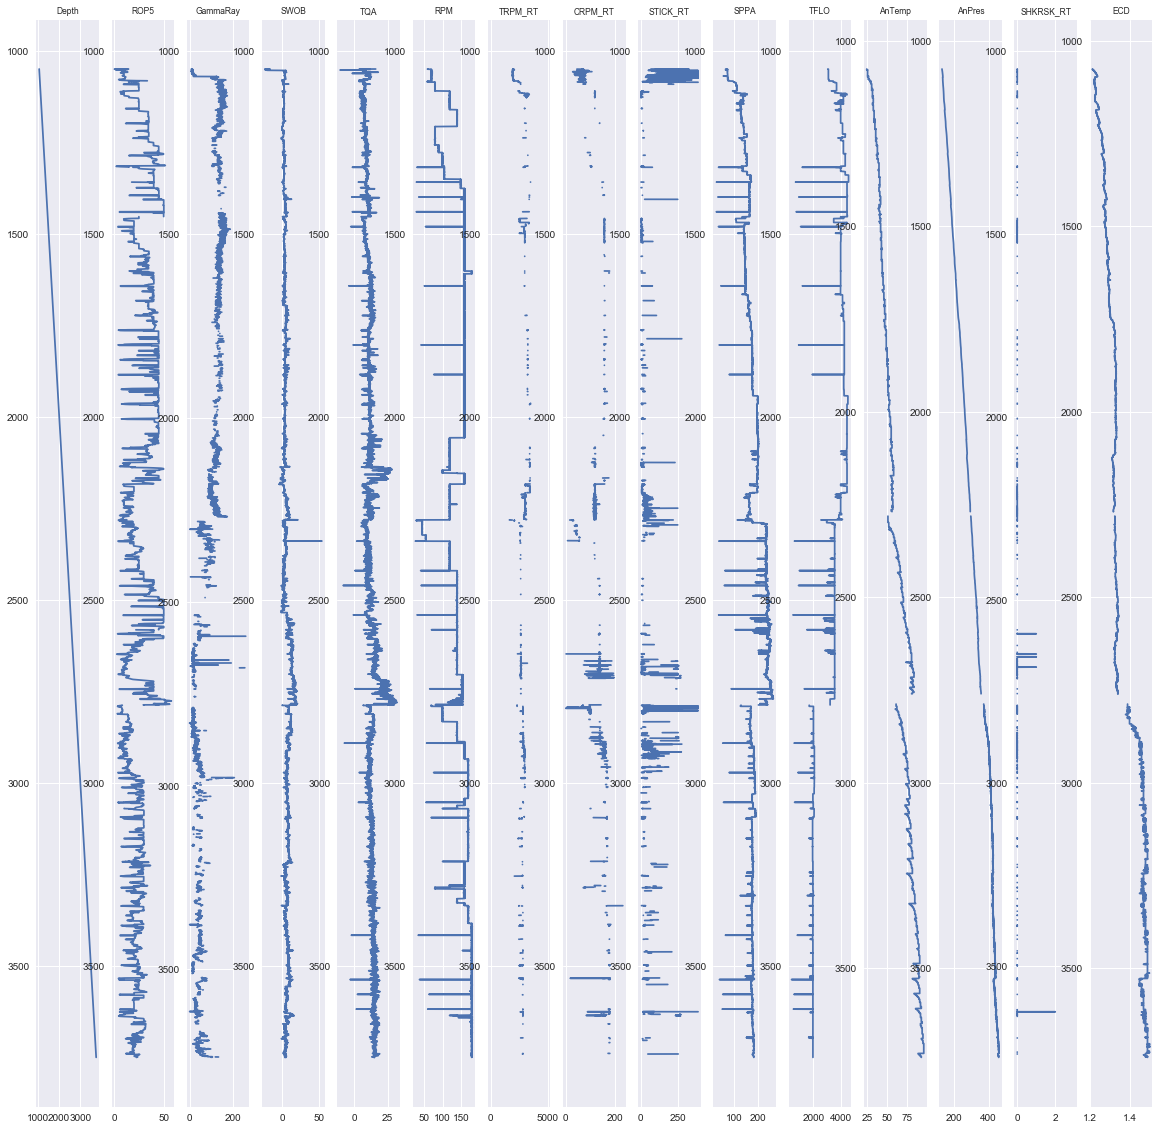

In [17]:
fig,axes = plt.subplots(1,len(data_original.columns), figsize=(20,20))
for i,log in enumerate(data_original.columns):
    axes[i].plot(data_original[log],data_original['Depth'])
    axes[i].invert_yaxis()
    axes[i].set_title(log,fontsize=8.5)

## Relationship between variables
To discard features or variables from the model

Wall time: 1min 23s


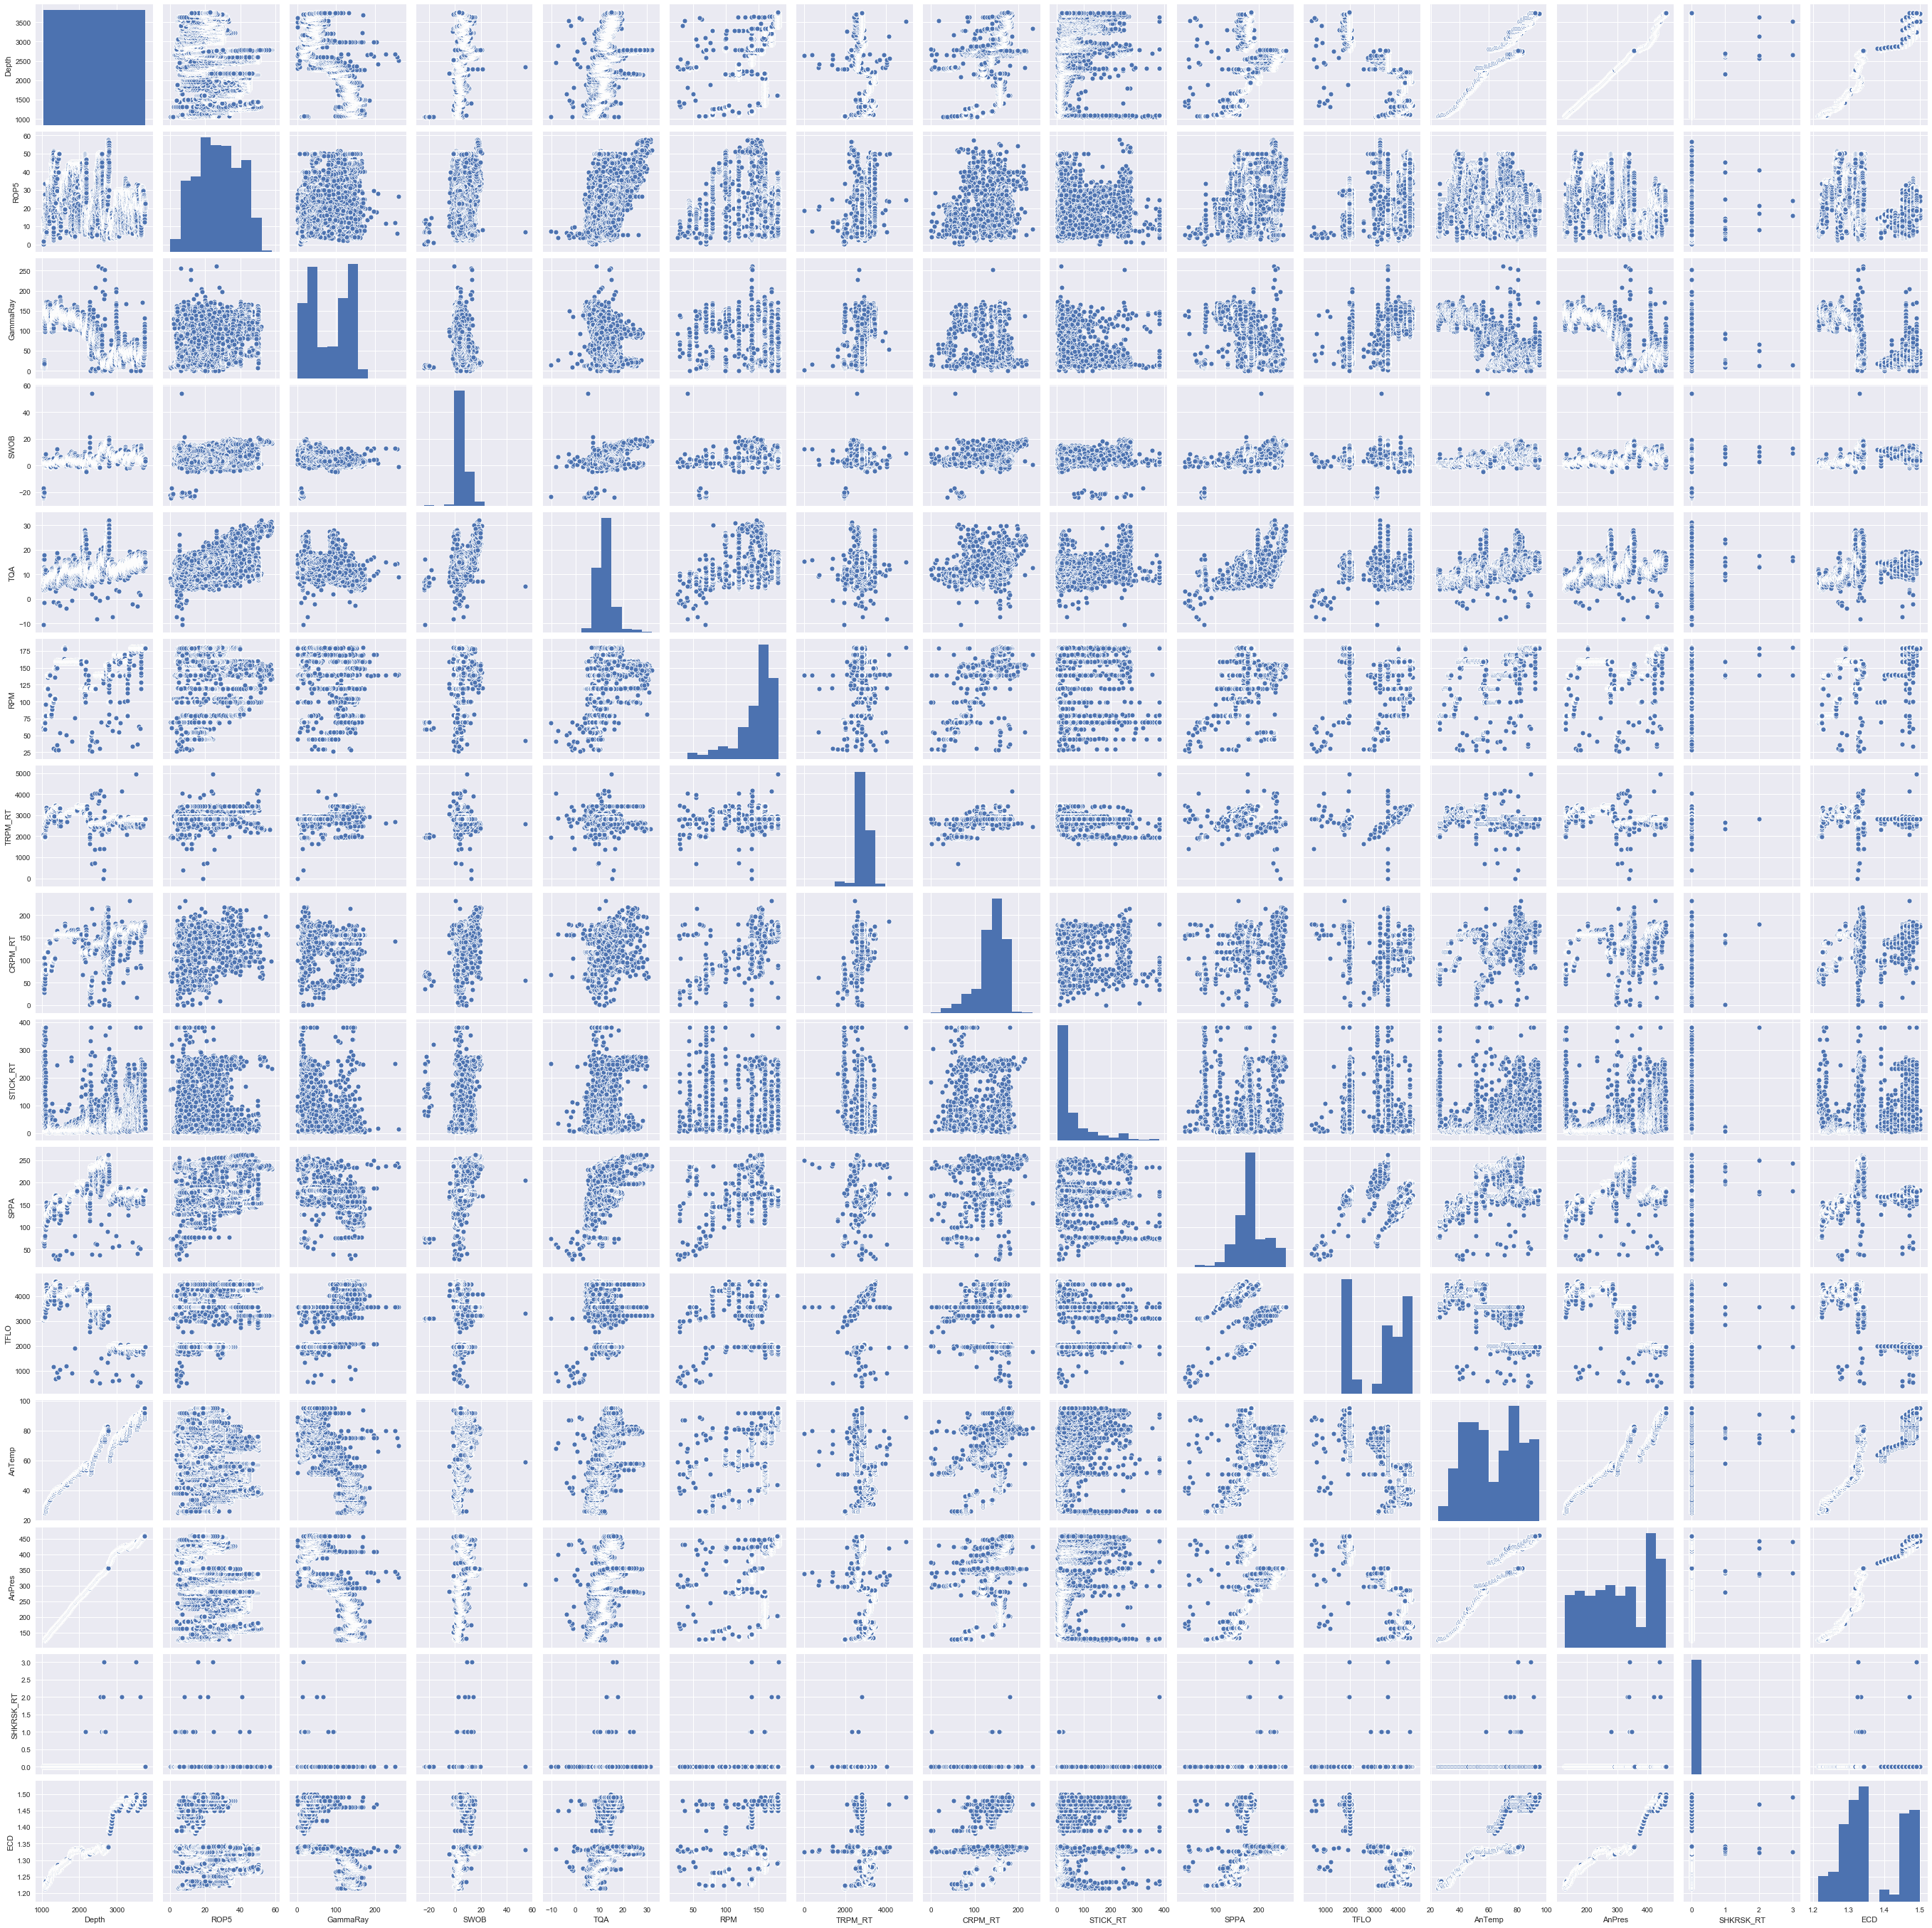

In [18]:
%%time
sns.pairplot(data_original)
print("Pairplot:")

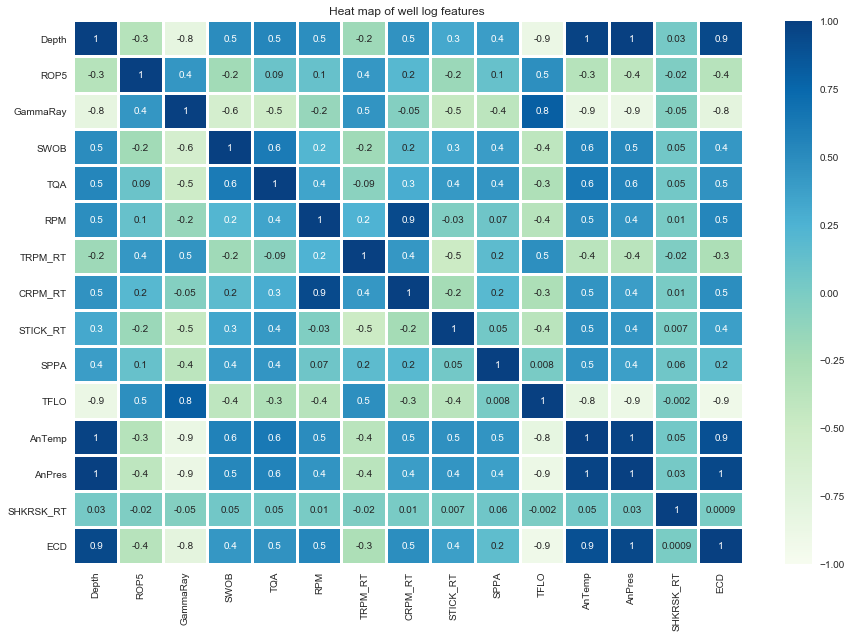

Wall time: 2.82 s


In [31]:
%%time
plt.figure(figsize=(15,10))
sns.heatmap(data_original.corr(), annot=True,fmt = '.1g', cmap= 'GnBu',linewidths=2,vmin=-1, vmax=1, center= 0)
plt.title('Heat map of well log features ')   
plt.show()

Visual statistical properties of dataframe:


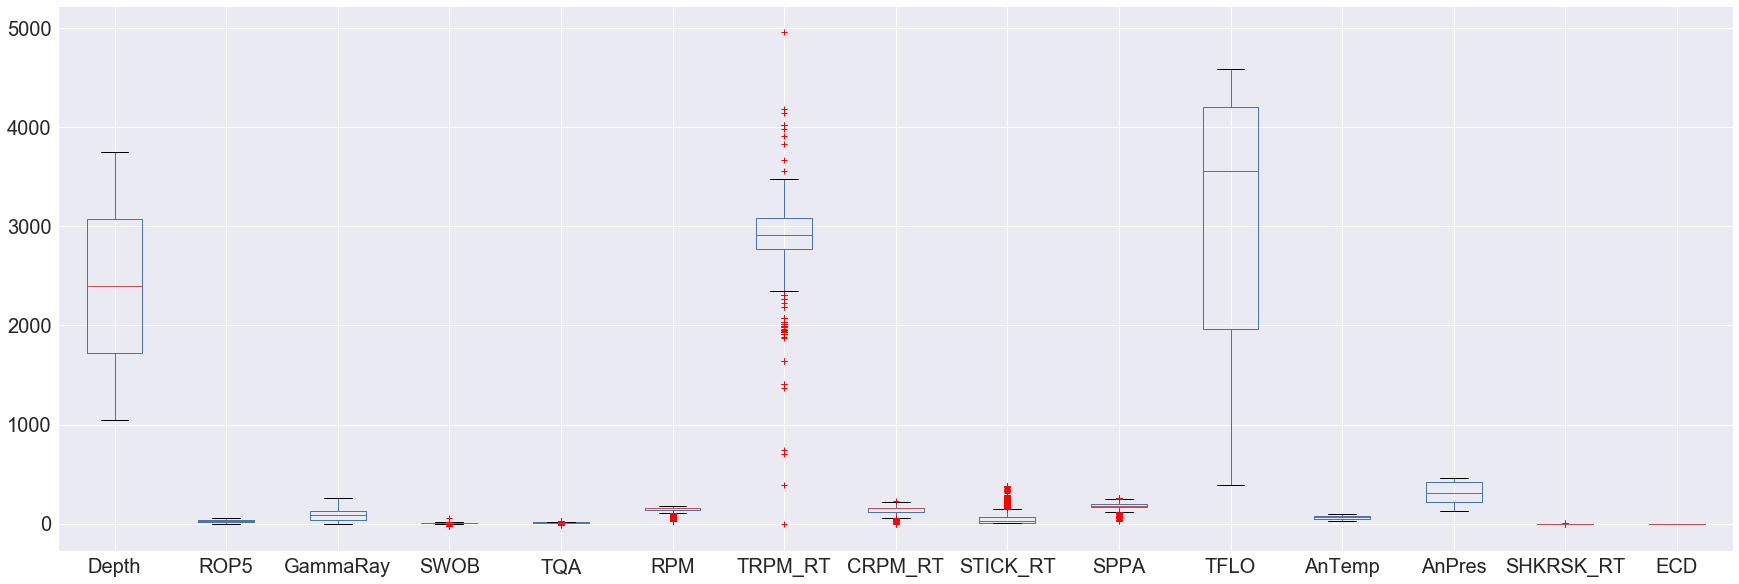

In [45]:
print("Visual statistical properties of dataframe:")
bp=data_original.plot.box(sym='r+', figsize=(30,10),fontsize=20)

In [38]:
print("Numerical statistical properties of dataframe:")
data_original.describe()

Numerical statistical properties of dataframe:


Depth          ROP5      GammaRay          SWOB           TQA  \
count  17718.000000  17694.000000  10886.000000  17714.000000  17714.000000   
mean    2399.988517     27.633501     84.136908      5.228625     12.348109   
std      779.443808     12.329690     49.822543      3.857471      3.512170   
min     1050.036000      0.318000      0.000000    -24.093000    -10.415000   
25%     1725.053700     18.480000     37.470000      2.586000     10.279350   
50%     2399.919000     26.680950     87.891000      4.322300     11.962850   
75%     3074.936700     38.961050    132.250000      7.180000     14.170000   
max     3749.954400     57.799100    260.898700     54.291200     32.175200   

                RPM      TRPM_RT      CRPM_RT     STICK_RT          SPPA  \
count  17714.000000  6386.000000  6390.000000  6404.000000  17714.000000   
mean     145.806880  2908.021910   138.906103    53.369457    180.669401   
std       30.392691   323.616544    33.227244    69.270302     34.065291   
min       26.167600     0.000000     0.000000     3.000000     28.735000   
25%      139.000000  2773.440000   118.000000     9.000000    164.669250   
50%      159.000000  2911.551500   156.000000    24.000000    176.250000   
75%      160.576250  3085.938000   160.000000    66.000000    196.871500   
max      181.000000  4960.940000   232.000000   381.000000    262.284000   

               TFLO        AnTemp        AnPres    SHKRSK_RT           ECD  
count  17714.000000  17217.000000  17217.000000  6457.000000  17217.000000  
mean    3271.793717     62.933961    310.204645     0.004491      1.364792  
std     1021.047171     18.438429    101.175368     0.087004      0.083728  
min      388.740000     25.000000    127.898000     0.000000      1.214000  
25%     1962.830000     47.000000    220.839000     0.000000      1.302000  
50%     3561.243800     63.000000    311.574200     0.000000      1.331000  
75%     4205.243000     79.000000    418.100000     0.000000      1.470000  
max     4583.442000     95.000000    460.810000     3.000000      1.500000

In [46]:
total = 0 ; percent = 0
total = data_original.isna().sum().sort_values(ascending = True)
percent = round(((data_original.isna().sum()/data_original.isna().count())*100),2).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total ","Percent"])
print("Missing data in dataframe:")
missing_data

Missing data in dataframe:


Total   Percent
Depth           0     0.00
SWOB            4     0.02
TQA             4     0.02
RPM             4     0.02
SPPA            4     0.02
TFLO            4     0.02
ROP5           24     0.14
AnTemp        501     2.83
AnPres        501     2.83
ECD           501     2.83
GammaRay     6832    38.56
SHKRSK_RT   11261    63.56
STICK_RT    11314    63.86
CRPM_RT     11328    63.93
TRPM_RT     11332    63.96

Pie chart of dataframe missing values


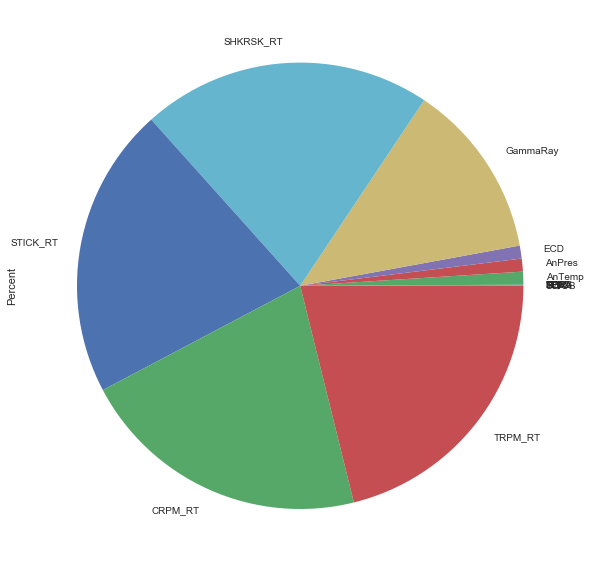

In [61]:
print("Pie chart of dataframe missing values")
plot = missing_data.plot.pie(y='Percent', figsize=(10,15),legend=False,)

### Major missing data features
- SHKRSK_RT : Transverse Shock Risk, Real-Time (Lateral/Transverse vibration )
- STICK_RT : Stick Slip Indicator, Real-Time
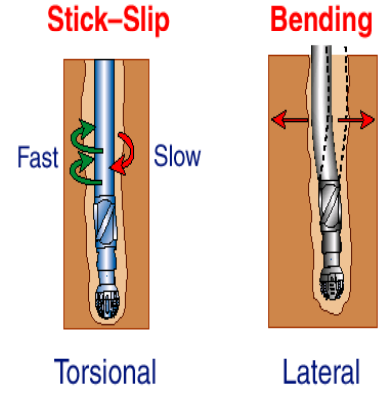

- CRPM_RT : Collar Rotational Speed, Real-Time
- TRPM_RT : Turbine RPM, Real-Time
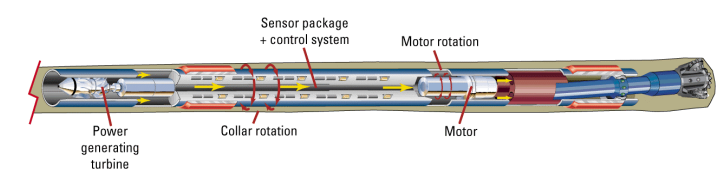

## Missing data solution
- K-Nearest Neighbors filling 
- Average filling
- Deletion of whole rows


### KNN imputer filling
`n_neighbors : int, default=5`
    Number of neighboring samples to use for imputation

In [73]:
from sklearn.impute import KNNImputer

In [81]:
print("Columns in dataframe :\n",data_original.columns.values)
print("Length of columns:",len(data_original.columns))

Columns in dataframe :
 ['Depth' 'ROP5' 'GammaRay' 'SWOB' 'TQA' 'RPM' 'TRPM_RT' 'CRPM_RT'
 'STICK_RT' 'SPPA' 'TFLO' 'AnTemp' 'AnPres' 'SHKRSK_RT' 'ECD']
Length of columns: 15


In [85]:
%%time
imputer = KNNImputer(n_neighbors=5)
knn_data = pd.DataFrame(imputer.fit_transform(data_original),columns = data_original.columns)

Wall time: 6min 49s


In [95]:
print("Original data standard deviation:")
data_original.std()

Original data standard deviation:


Depth         779.443808
ROP5           12.329690
GammaRay       49.822543
SWOB            3.857471
TQA             3.512170
RPM            30.392691
TRPM_RT       323.616544
CRPM_RT        33.227244
STICK_RT       69.270302
SPPA           34.065291
TFLO         1021.047171
AnTemp         18.438429
AnPres        101.175368
SHKRSK_RT       0.087004
ECD             0.083728
dtype: float64

In [94]:
print("KNN filled data standard deviation:")
knn_data.std()

KNN filled data standard deviation


Depth         779.443808
ROP5           12.332298
GammaRay       48.506289
SWOB            3.857480
TQA             3.512328
RPM            30.394957
TRPM_RT       302.593675
CRPM_RT        30.568713
STICK_RT       63.696816
SPPA           34.063269
TFLO         1021.018141
AnTemp         18.735706
AnPres        101.860328
SHKRSK_RT       0.069826
ECD             0.084219
dtype: float64

In [125]:
knn_data.to_csv(r'C:\Users\Luis Navarro\Desktop\ProgrammingStuff\MachineLearning\Petroleum\Drilling\knn_data.csv', index = False)

### Average filling

In [113]:
avg_data = pd.DataFrame()
for i in data_original.columns:
    avg_data[i] = data_original[i].fillna(value=data_original[i].mean())

In [117]:
print("Original data standard deviation:")
data_original.std()

Original data standard deviation:


Depth         779.443808
ROP5           12.329690
GammaRay       49.822543
SWOB            3.857471
TQA             3.512170
RPM            30.392691
TRPM_RT       323.616544
CRPM_RT        33.227244
STICK_RT       69.270302
SPPA           34.065291
TFLO         1021.047171
AnTemp         18.438429
AnPres        101.175368
SHKRSK_RT       0.087004
ECD             0.083728
dtype: float64

In [119]:
print("AVG filled data standard deviation:")
avg_data.std()

AVG filled data standard deviation:


Depth         779.443808
ROP5           12.321336
GammaRay       39.052156
SWOB            3.857036
TQA             3.511774
RPM            30.389260
TRPM_RT       194.274622
CRPM_RT        19.953343
STICK_RT       41.643166
SPPA           34.061446
TFLO         1020.931903
AnTemp         18.175859
AnPres         99.734594
SHKRSK_RT       0.052520
ECD             0.082535
dtype: float64

In [126]:
avg_data.to_csv(r'C:\Users\Luis Navarro\Desktop\ProgrammingStuff\MachineLearning\Petroleum\Drilling\avg_data.csv', index = False)

### Deletion of rows

In [121]:
del_data = data_original.dropna()

In [122]:
print("Original data standard deviation:")
data_original.std()

Original data standard deviation:


Depth         779.443808
ROP5           12.329690
GammaRay       49.822543
SWOB            3.857471
TQA             3.512170
RPM            30.392691
TRPM_RT       323.616544
CRPM_RT        33.227244
STICK_RT       69.270302
SPPA           34.065291
TFLO         1021.047171
AnTemp         18.438429
AnPres        101.175368
SHKRSK_RT       0.087004
ECD             0.083728
dtype: float64

In [123]:
print("AVG filled data standard deviation:")
del_data.std()

AVG filled data standard deviation:


Depth        670.922924
ROP5           4.728305
GammaRay      51.671709
SWOB           3.480563
TQA            3.006849
RPM           28.801212
TRPM_RT      304.555422
CRPM_RT       29.824842
STICK_RT      62.024621
SPPA          33.517804
TFLO         985.110105
AnTemp        15.985728
AnPres        93.476748
SHKRSK_RT      0.092623
ECD            0.075827
dtype: float64

In [127]:
del_data.to_csv(r'C:\Users\Luis Navarro\Desktop\ProgrammingStuff\MachineLearning\Petroleum\Drilling\del_data.csv', index = False)